In [24]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

train_data = pd.read_csv("../datasets/train.csv")
#print train_data.head()
print train_data[train_data['S/N']==4024]
class_counts = train_data.groupby('Bootcamp').size()
print(class_counts)

from sklearn.cross_validation import train_test_split
##TODO: build target data train_target
# x_train, x_test, y_train, y_test = train_test_split(train_data, train_target) #split training data

       S/N Joined Proctor on           Stage  Entry Bootcamp  Score % Score  % Completed  \
4023  4024        12/29/2015  Andela Proctor      0    False    110  55.00%           20   

      M1-S1 Correct  M1-S1 Wrong      ...       M8-S1 Tries  M8-S2 Tries  M9-S1 Correct  \
4023              2            4      ...                 0            0              0   

      M9-S1 Wrong  M9-S1 Tries  M9-S2 Tries  M10-S1 Correct  M10-S1 Wrong  M10-S1 Tries  \
4023            0            0            0               0             0             0   

      M10-S2 Tries  
4023             0  

[1 rows x 48 columns]
Bootcamp
False    6953
True      125
dtype: int64


## Transform data

In [4]:
#TODO: clean up data

#check skew
print train_data.skew()

#TODO: normalize data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

#TODO: standardize data: useful for logistic regression
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X)
# rescaledX = scaler.transform(X)

S/N                0.000000
Entry             15.265528
Bootcamp           7.325621
Score              0.537591
% Completed        1.823234
M1-S1 Correct      0.883079
M1-S1 Wrong        1.506063
M1-S1 Tries        1.506063
M1-S2 Tries        0.000000
M2-S1 Correct      0.736560
M2-S1 Wrong        1.225415
M2-S1 Tries        1.225415
M2-S2 Tries       57.343549
M3-S1 Correct      0.000000
M3-S1 Wrong        1.360181
M3-S1 Tries        1.359341
M3-S2 Tries       20.418207
M4-S1 Correct      2.067178
M4-S1 Wrong        3.336793
M4-S1 Tries        3.334401
M4-S2 Tries       27.441063
M5-S1 Correct      2.322030
M5-S1 Wrong        5.987993
M5-S1 Tries        5.962707
M5-S2 Tries       12.543297
M6-S1 Correct      2.122098
M6-S1 Wrong        5.378100
M6-S1 Tries        0.000000
M6-S2 Tries       21.181162
M7-S1 Correct      4.292651
M7-S1 Wrong        3.487713
M7-S1 Tries        3.486919
M7-S2 Tries        0.000000
M8-S1 Correct      2.261386
M8-S1 Wrong        3.341386
M8-S1 Tries        3

## Visualize Data

In [5]:
#Pearson's Correlation coefficient
pd.set_option( 'display.width' , 100)
pd.set_option( 'precision' , 3)
correlations = train_data.corr(method='pearson')
print correlations

                  S/N  Entry  Bootcamp  Score  % Completed  M1-S1 Correct  M1-S1 Wrong  \
S/N             1.000  0.030     0.050  0.418        0.311          0.440    2.707e-01   
Entry           0.030  1.000     0.487  0.123        0.158          0.100   -4.156e-03   
Bootcamp        0.050  0.487     1.000  0.244        0.323          0.199    1.109e-02   
Score           0.418  0.123     0.244  1.000        0.829          0.902    6.108e-01   
% Completed     0.311  0.158     0.323  0.829        1.000          0.725    3.178e-01   
M1-S1 Correct   0.440  0.100     0.199  0.902        0.725          1.000    3.290e-01   
M1-S1 Wrong     0.271 -0.004     0.011  0.611        0.318          0.329    1.000e+00   
M1-S1 Tries     0.271 -0.004     0.011  0.611        0.318          0.329    1.000e+00   
M1-S2 Tries       NaN    NaN       NaN    NaN          NaN            NaN          NaN   
M2-S1 Correct   0.376  0.102     0.192  0.898        0.737          0.820    5.522e-01   
M2-S1 Wron

Populating the interactive namespace from numpy and matplotlib


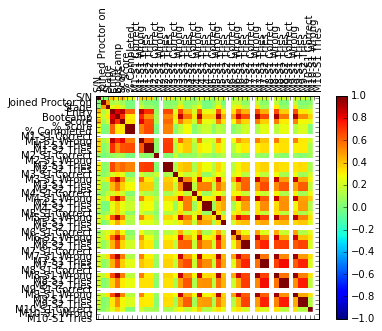

In [15]:
#corellation matrix

import matplotlib.pyplot as plt
%pylab inline

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,47,1)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(train_data.columns, rotation='vertical')
ax.set_yticklabels(train_data.columns)
plt.show()

Populating the interactive namespace from numpy and matplotlib


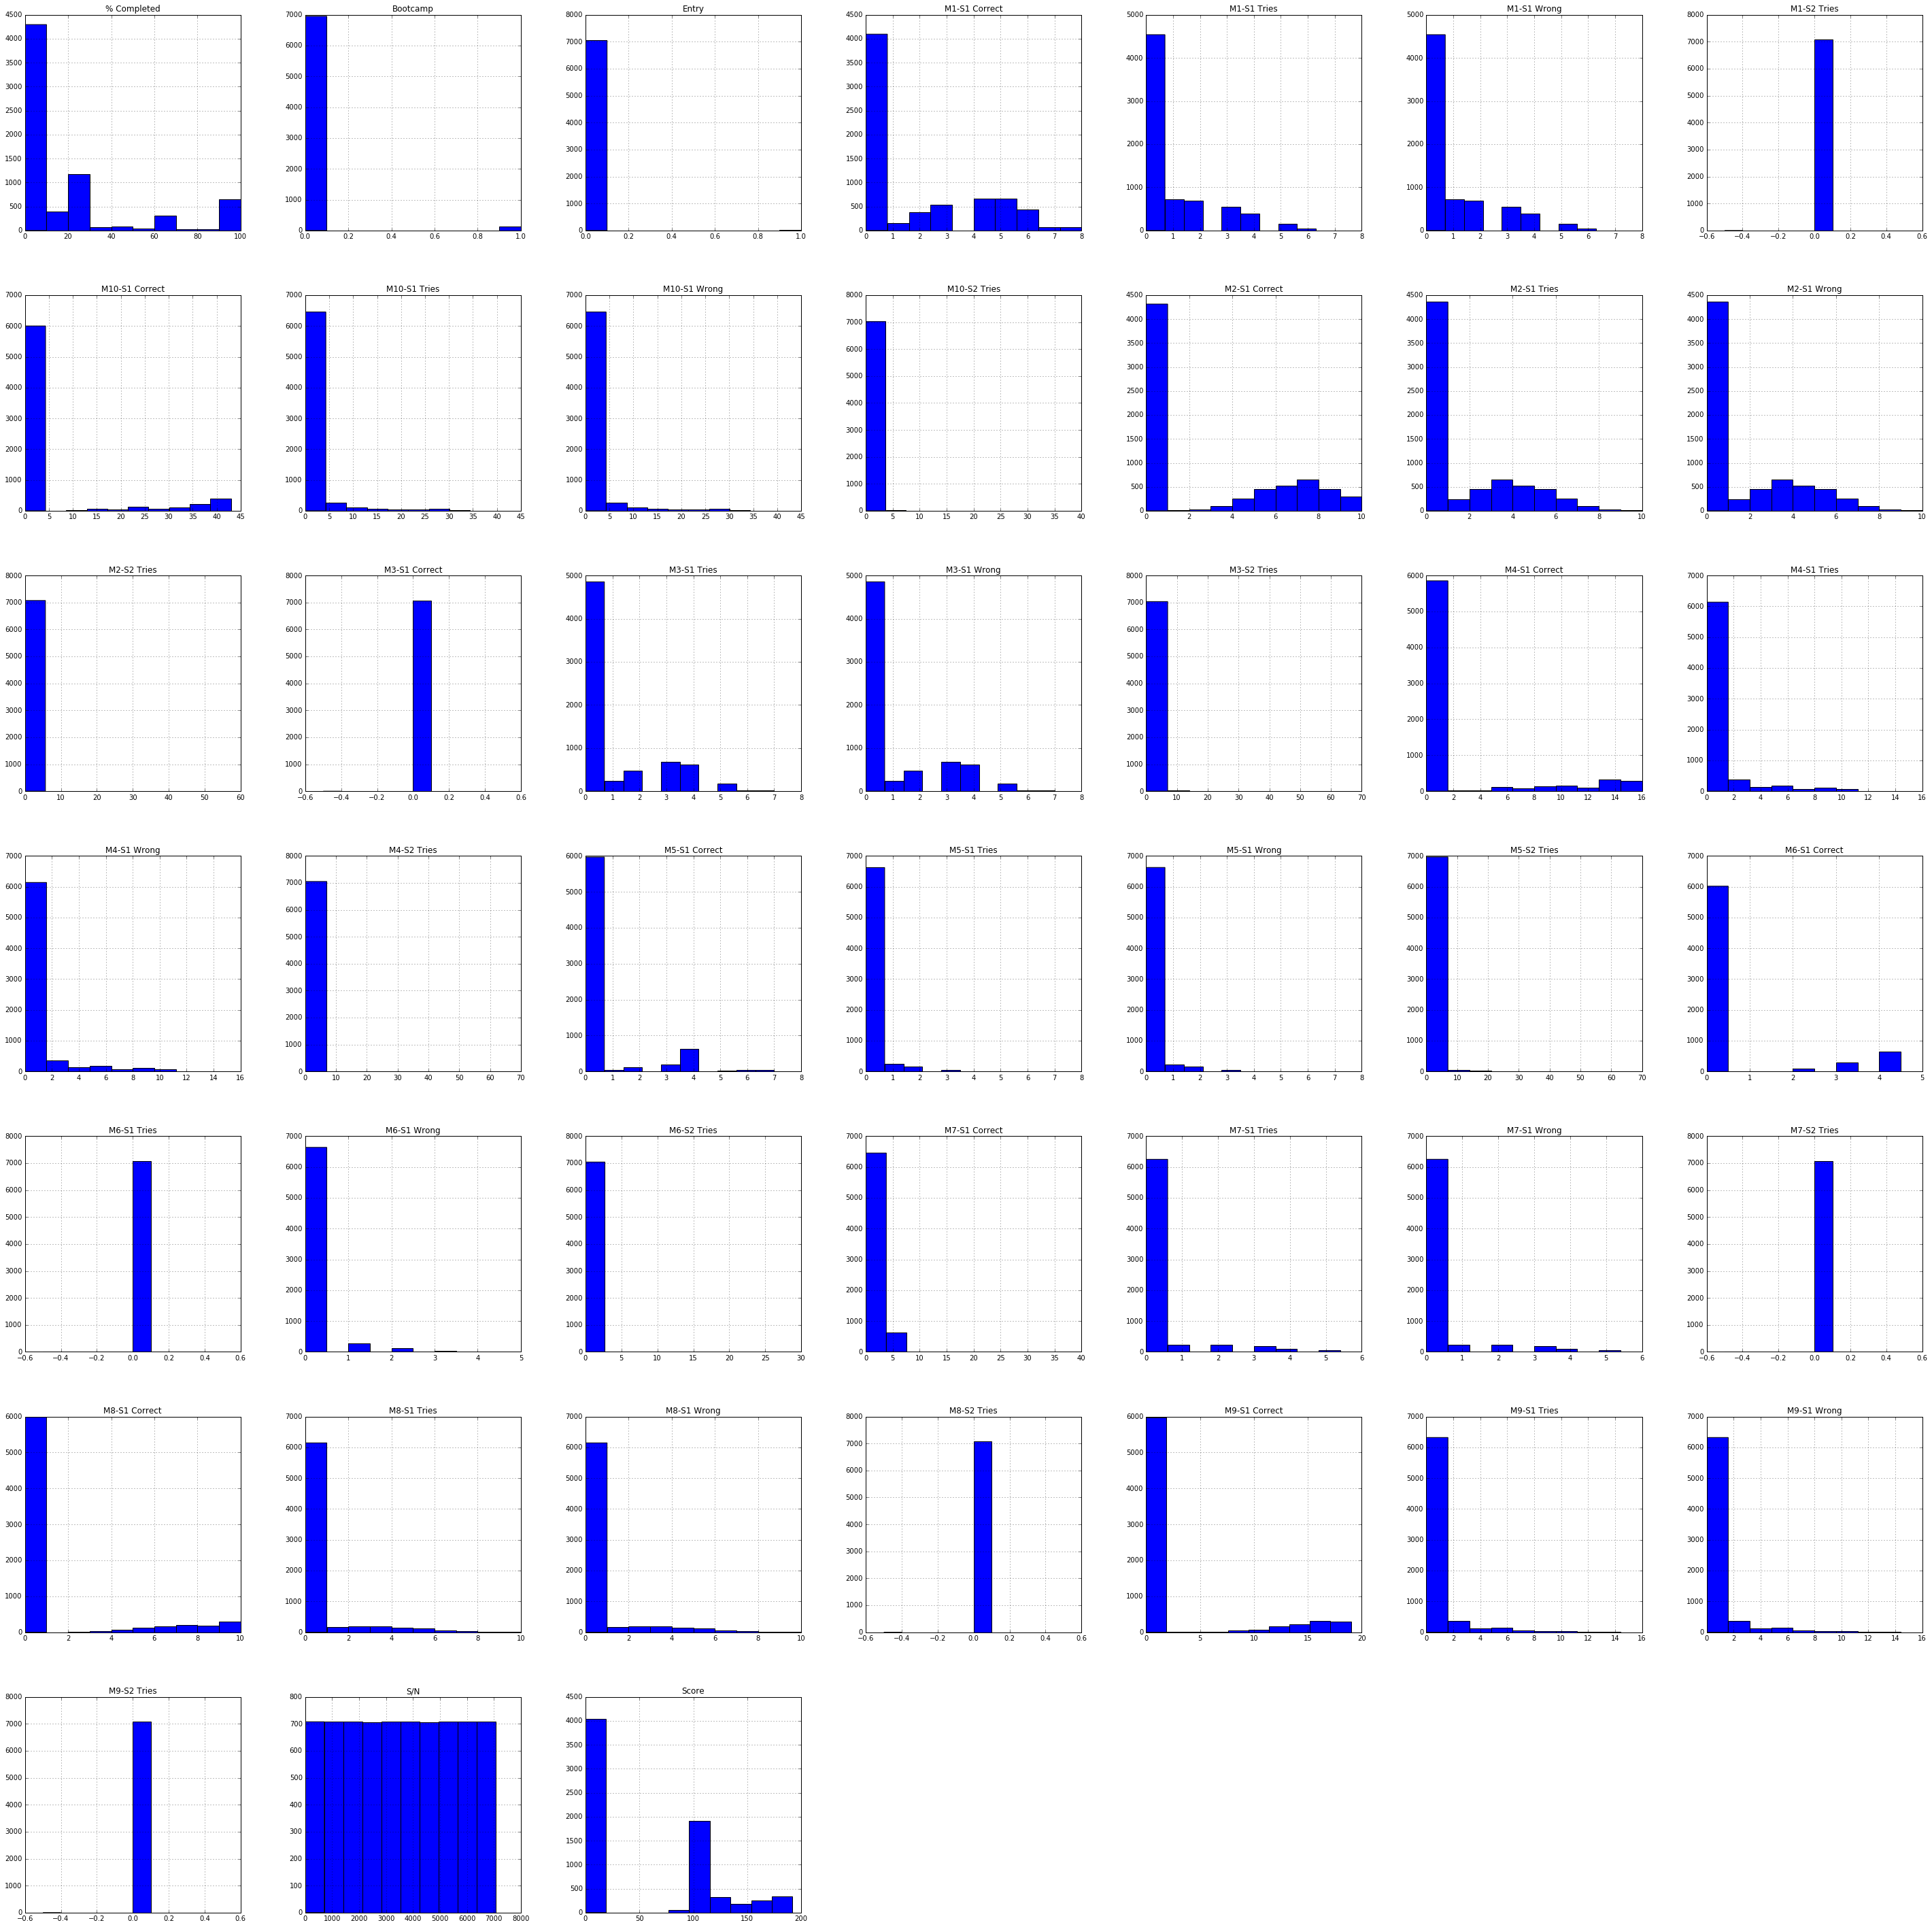

LinAlgError: singular matrix

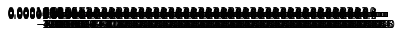

In [17]:
import matplotlib.pyplot as plt
%pylab inline

#Histogram
train_data.hist(figsize=(50,50))
plt.show()

train_data.plot(kind='density', subplots=True, layout=(45,45), sharex=False)
plt.show()

## Build Model

## Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=5, scoring="roc_auc") #use roc_auc or average_precision for imbalanced class

ImportError: No module named model_selection